### XGBoost

- 트리 기반의 앙상블 기법  
- 분류에 있어서 다른 알고리즘 보다 좋은 예측 성능을 보여줌  
- XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행시간과 과적합 규제 부재등의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습 가능

In [23]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [25]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
}
num_rounds = 400

In [26]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds=100, evals=evals)

[19:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32223	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-

In [27]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [28]:
preds = [1 if x> 0.5 else 0 for x in predicts]

In [29]:
print("정확도 : {}".format(accuracy_score(y_test, preds)))
print("정확도 : {}".format(precision_score(y_test, preds)))
print("정확도 : {}".format(recall_score(y_test, preds)))

정확도 : 0.9736842105263158
정확도 : 0.972972972972973
정확도 : 0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

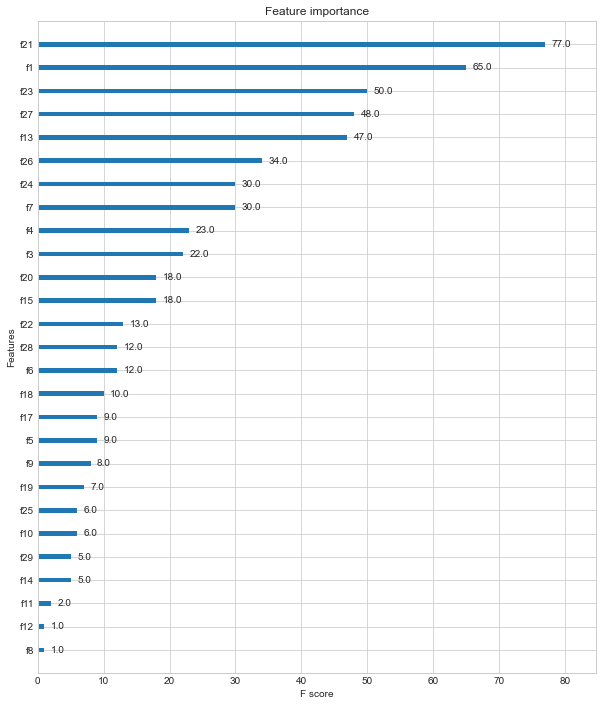

In [30]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

# f21이 가장 중요하게 나온다.

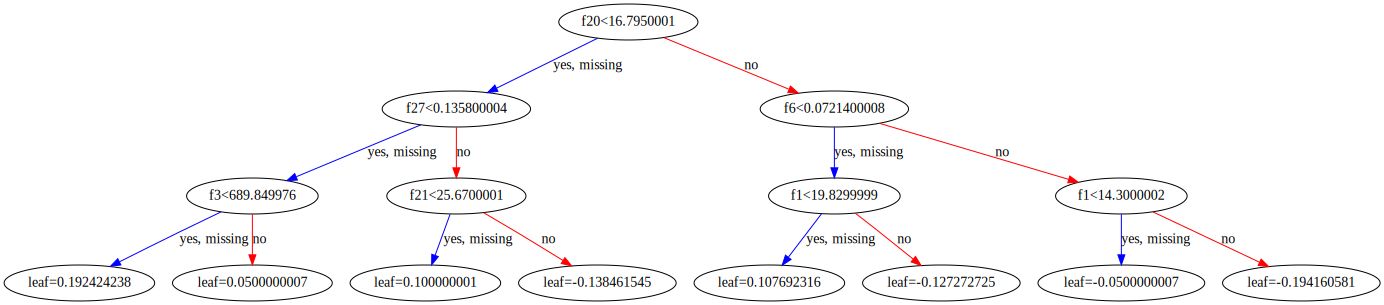

In [32]:
dot_data = xgb.to_graphviz(xgb_model)
#graph = graphviz.Source(dot_data)
#graph
dot_data

In [33]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [35]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [40]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 1.024225378036499 (+/- 0.08657570316347753)
avg fit time : 0.0049282550811767575 (+/- 0.0005593406289235362)
avg fit time : 0.96 (+/- 0.024944382578492935)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

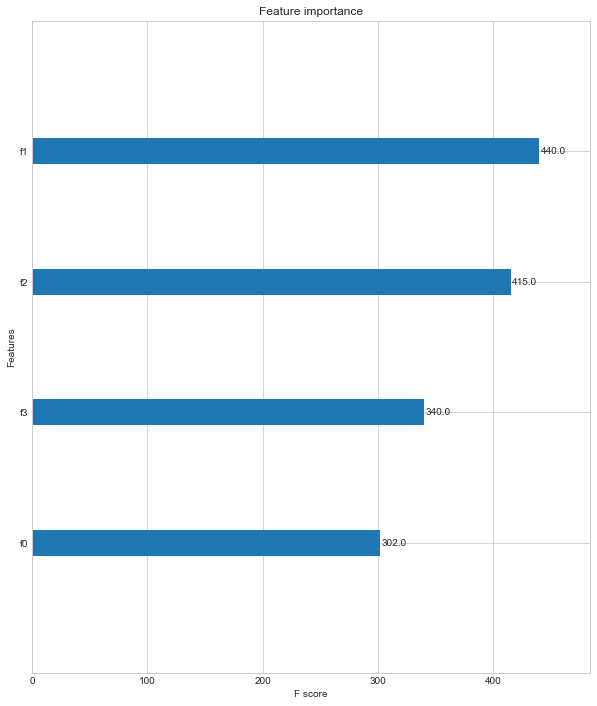

In [41]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

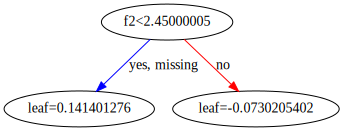

In [42]:
dot_data = xgb.to_graphviz(xgbc)
#graph = graphviz.Source(dot_data)
#graph
dot_data

In [43]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [44]:
xgbc_w = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc_w.fit(X_train, y_train)
preds = xgbc_w.predict(X_test)

In [45]:
cross_val = cross_validate(
    estimator=xgbc_w,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.8406760692596436 (+/- 0.0482922525581841)
avg fit time : 0.0051691532135009766 (+/- 0.000773311931140975)
avg fit time : 0.9609523809523809 (+/- 0.028267341226138717)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

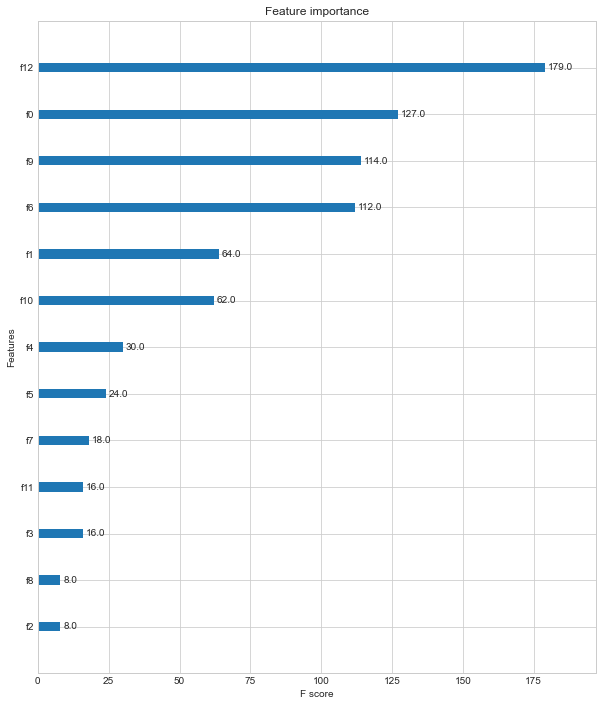

In [47]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc_w, ax=ax)

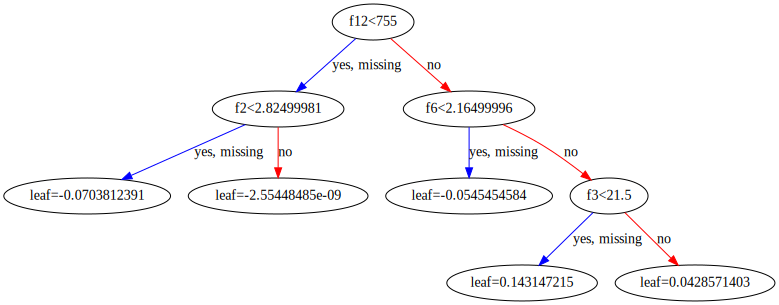

In [48]:
dot_data = xgb.to_graphviz(xgbc_w)
#graph = graphviz.Source(dot_data)
#graph
dot_data

In [49]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [50]:
xgbc_c = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc_c.fit(X_train, y_train)
preds = xgbc_c.predict(X_test)

In [51]:
cross_val = cross_validate(
    estimator=xgbc_c,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.7749126434326172 (+/- 0.024935368448019)
avg fit time : 0.005790090560913086 (+/- 0.001176759048569221)
avg fit time : 0.9736376339077782 (+/- 0.009609619188189153)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

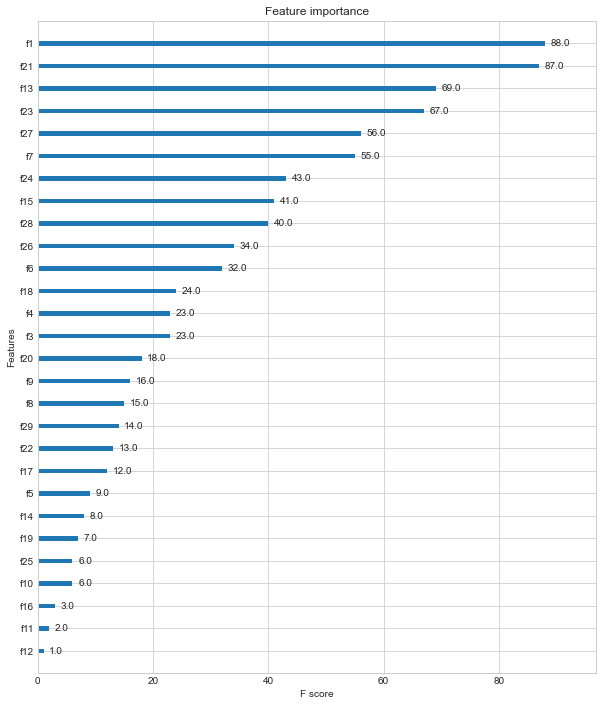

In [54]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc_c, ax=ax)

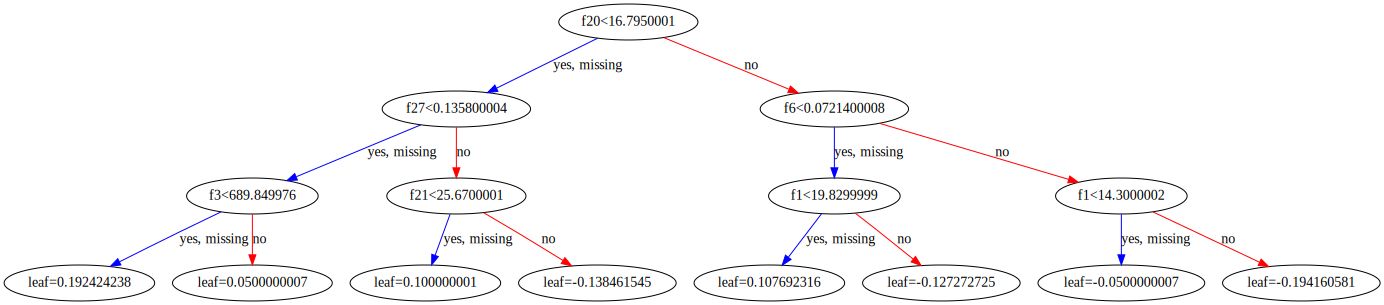

In [53]:
dot_data = xgb.to_graphviz(xgbc_c)
#graph = graphviz.Source(dot_data)
#graph
dot_data

In [55]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [58]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [59]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.8770102500915528 (+/- 0.021189437888794474)
avg fit time : 0.006757974624633789 (+/- 0.0010378777602727918)
avg fit time : 0.6884390736705599 (+/- 0.1649974770303876)


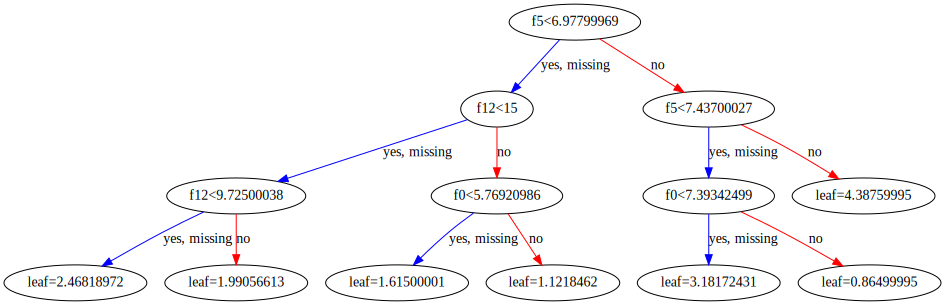

In [60]:
dot_data = xgb.to_graphviz(xgbr)
#graph = graphviz.Source(dot_data)
#graph
dot_data

In [61]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [62]:
xgbr_d = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr_d.fit(X_train, y_train)
preds = xgbr_d.predict(X_test)

In [63]:
cross_val = cross_validate(
    estimator=xgbr_d,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.8592688083648682 (+/- 0.024575466706660012)
avg fit time : 0.006314754486083984 (+/- 0.000720024424672847)
avg fit time : 0.30005291115066424 (+/- 0.07589309667544569)


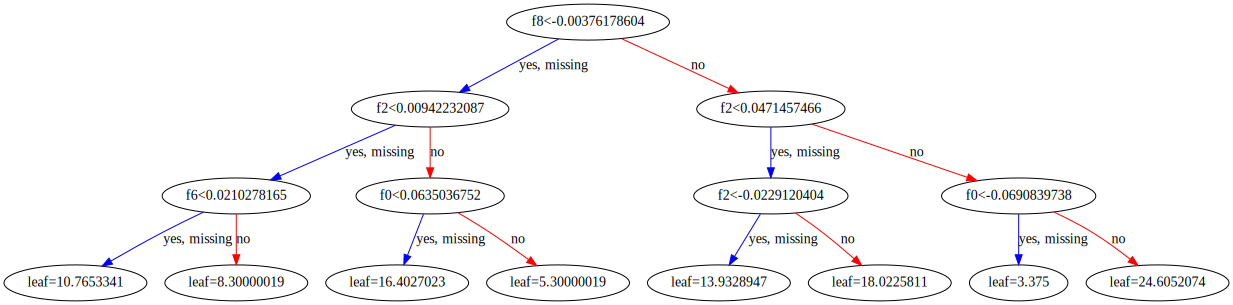

In [64]:
dot_data = xgb.to_graphviz(xgbr_d)
#graph = graphviz.Source(dot_data)
#graph
dot_data

### LightGBM

- 빠른 학습과 예측 시간  
- 더 적은 메모리 사용  
- 범주형 특징의 자동 변환과 최적 분할

In [65]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [66]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [76]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True) #verbose는 동작 과정을 출력해준다.
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0

In [77]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.2237771987915039 (+/- 0.03341266233199508)
avg fit time : 0.0022216796875 (+/- 0.0004956303455408663)
avg fit time : 0.9600000000000002 (+/- 0.04898979485566355)


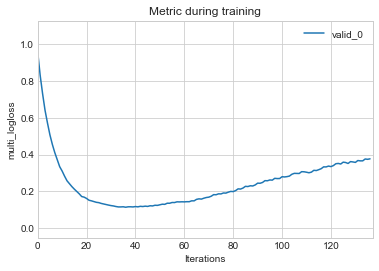

In [78]:
plot_metric(lgbmc); #학습 시점과 loss가 얼마나 떨어졌는지 확인 가능

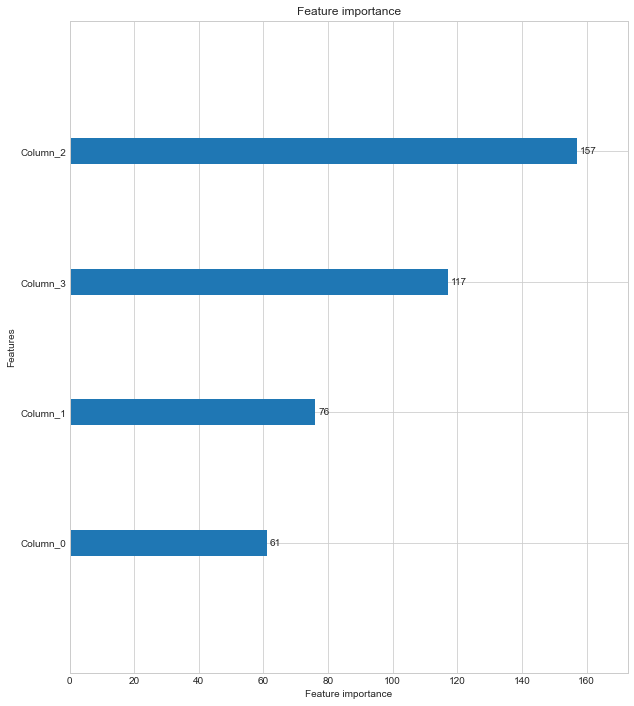

In [79]:
plot_importance(lgbmc, figsize=(10,12));

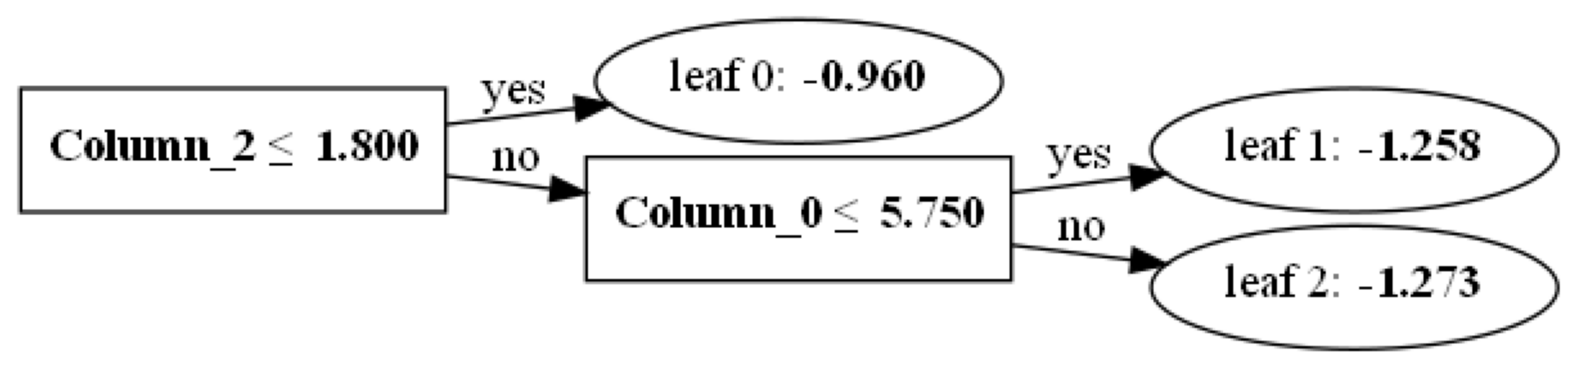

In [80]:
plot_tree(lgbmc, figsize=(28,24));

#### 기본적으로 Tree 계열이라 Classfier에 더 적합 (Regressor 보다)

In [81]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [82]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	val

In [83]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.46918320655822754 (+/- 0.08503619757451203)
avg fit time : 0.0030233383178710936 (+/- 0.0010902077121529095)
avg fit time : 0.5692468252571979 (+/- 0.2956636613238221)


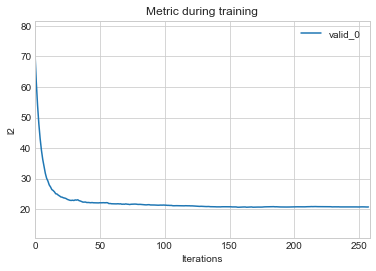

In [86]:
plot_metric(lgbmr); #학습 시점과 loss가 얼마나 떨어졌는지 확인 가능

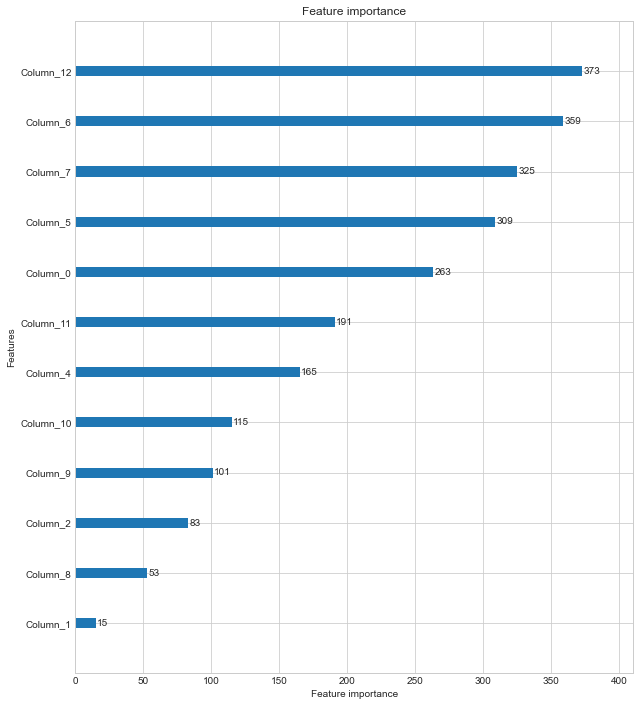

In [87]:
plot_importance(lgbmr, figsize=(10,12));

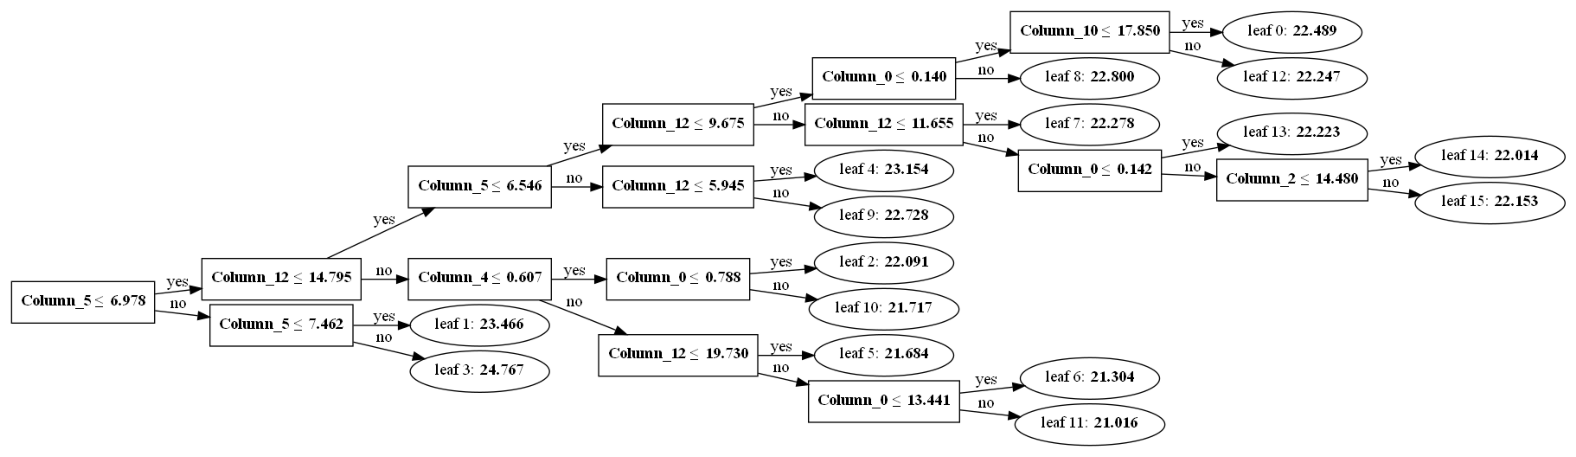

In [88]:
plot_tree(lgbmr, figsize=(28,24));